# Analyzing Sales Data in Alteryx

## 📖 Background
Test your Alteryx skills on four real-world datasets focusing on retail sales data. Using Alteryx Designer, you'll prepare, blend, and analyze data to answer questions about sales trends and performance. This will help you to identify key drivers of sales success, enabling informed business decisions and strategic planning.

Make sure to check out [these Alteryx courses](https://app.datacamp.com/learn/skill-tracks/alteryx-fundamentals) to help you get started.

If you need to download Alteryx to your computer, you can get the trial version 
[here](https://www.alteryx.com/designer-trial/free-trial-alteryx).

Use this Datalab workbook to download the data and import it in Alteryx Designer on your machine. When you're finished, share your work by attaching your `.yzxp` file to this workbook. To do so, click _File_ > _Show workbook files_, and then upload the file.

## 💾 The data


The data consists of four tables:
- **Customer Orders-East**: individiual orders from Eastern states
- **Customer Orders-West**: individiual orders from Western states
- **Order details**: information on each order ID, including the sales price, number of items ordered, and the product category
- **Regions**: information on states and their corresponding region

More information about each table can be found [here](https://assets.datacamp.com/production/repositories/6627/datasets/f382feaed82493cf7f12579b2ad196b0687e3d2c/Metadata%20-%20Case%20study_%20Analyzing%20Sales%20Data%20in%20Alteryx-v1.pdf).



➡️ The data can be downloaded from the _Files_ section: click _File > Show workbook files_. 

## 💪 Challenge
1. Using Alteryx Designer, create workflows to answer the following questions:

 - What were the 10 most profitable orders?
 - What day of the week is most profitable, and by how much?
 - How do the profits vary by category and region?
 - What sub-categories contributed to the most profit in each category?

2. Don't feel limited by the questions above, you're encouraged to use your skills and creativity to make your workflow your own. 
3. Create a screenshot of your (main) Alteryx workflow, and paste it into the designated field hereunder.
4. Summarize your findings in an executive summary.

## ✅ Checklist before publishing
- Make sure to upload your Alteryx `.yzxp` file to this Datalab workbook, by clicking _File_ > _Show workbook files_, and then upload the file.
- **Remove redundant text cells** like data background, challenge, and this checklist. You can add cells if necessary. Make your publication stand out!

## 📷 Dashboard screenshot
<_Paste one screenshot of your (main) Alteryx workflow here._>

## 🧾 Executive summary

The business performs best in the Southeast region, driven mainly by strong sales in the Electronics  category. Across categories, items (sub-categories) like Dress,  Printers,  Bookcases contributed significantly to overall profit.  The top sales are observed on Saturday and high-value customers like Gardner significantly drive profits.The insights suggest focusing on expanding successful product lines and replicating high-margin strategies from the Southeast region across others.


## 🌐 Upload your Alteryx file
Upload your `.yzxp` file by clicking _File_ > _Show workbook files_, and then upload the file.

## ✍️ Judging criteria
| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Executive summary** | 25% | <ul><li>Clarity of writing down your main findings.</li></ul> |
| **Insights** | 25%       | <ul><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Is the methodology clear?</li></ul>       |
| **Workflow design** | 30% | <ul><li>Is the workflow built efficiently?</li><li>Is the workflow well-structured and presented nicely?</li></ul>       |
| **Votes** | 20% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |


🏆 The winners will receive Alteryx SWAG!



## ⌛️ Time is ticking. Good luck!


In [190]:
import pandas as pd
import numpy as np

In [191]:
# Load datasets

df = pd.read_excel("data/Order Details.xlsx")
df1 = pd.read_excel("data/Customer Orders-West.xlsx")
df2 = pd.read_excel("data/Customer Orders-East.xlsx")
df3 = pd.read_csv("data/Regions.csv")

In [192]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Order Quantities,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Order ID,Sale Price,Cost per Item,Category,COD,Credit Card,Debit Card,EFT
1,B-25601,1275.00,18.14,Furniture - Bookcases,NaN,NaN,NaN,7
2,B-25601,66.00,15.60,Clothing - Scarf,NaN,NaN,NaN,5
3,B-25601,8.00,3.33,Clothing - Hat,3,NaN,NaN,NaN
4,B-25601,80.00,34.00,Electronics - Electronic Games,NaN,NaN,NaN,4


In [193]:
# Making the first row the column name
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [194]:
df.head()

,Order ID,Sale Price,Cost per Item,Category,COD,Credit Card,Debit Card,EFT
0,B-25601,1275.00,18.14,Furniture - Bookcases,NaN,NaN,NaN,7
1,B-25601,66.00,15.60,Clothing - Scarf,NaN,NaN,NaN,5
2,B-25601,8.00,3.33,Clothing - Hat,3,NaN,NaN,NaN
3,B-25601,80.00,34.00,Electronics - Electronic Games,NaN,NaN,NaN,4
4,B-25602,119.00,15.50,Clothing - Dress,8,NaN,NaN,NaN


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       1500 non-null   object
 1   Sale Price     1500 non-null   object
 2   Cost per Item  1500 non-null   object
 3   Category       1500 non-null   object
 4   COD            163 non-null    object
 5   Credit Card    684 non-null    object
 6   Debit Card     202 non-null    object
 7   EFT            451 non-null    object
dtypes: object(8)
memory usage: 93.9+ KB


In [196]:
# Convert data type of column Cost per item and Sale Price to interger
columns = ['Sale Price', 'Cost per Item']
for column in columns:
    df[column]= df[column].astype(float).astype(int)

In [197]:
# Fill missing values in columns COD, Credit card, Debit card and EFT
columns = ['COD', 'Credit Card', 'Debit Card', 'EFT']
for column in columns:
    df[column]= df[column].fillna(0)

In [198]:
# Convert data type of COD, Credit card, Debit card and EFT to interger
columns = ['COD', 'Credit Card', 'Debit Card', 'EFT']
for column in columns:
    df[column]= df[column].astype(int)

In [199]:
#Checking df information again to see if the changes are effected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       1500 non-null   object
 1   Sale Price     1500 non-null   int64 
 2   Cost per Item  1500 non-null   int64 
 3   Category       1500 non-null   object
 4   COD            1500 non-null   int64 
 5   Credit Card    1500 non-null   int64 
 6   Debit Card     1500 non-null   int64 
 7   EFT            1500 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 93.9+ KB


In [200]:
df.sample(5)

,Order ID,Sale Price,Cost per Item,Category,COD,Credit Card,Debit Card,EFT
1459,B-26089,59,5,Clothing - Shirt,0,0,6,0
284,B-25697,4,7,Clothing - Skirt,1,0,0,0
168,B-25656,30,7,Clothing - Scarf,0,0,0,5
505,B-25769,355,179,Clothing - Dress,0,0,2,0
952,B-25922,52,17,Clothing - Scarf,0,2,0,0


In [201]:
# Split category column into category and item
df[['Category', 'Item']] = df.Category.str.split('-', n=1, expand=True)

In [202]:
df.head()

,Order ID,Sale Price,Cost per Item,Category,COD,Credit Card,Debit Card,EFT,Item
0,B-25601,1275,18,Furniture,0,0,0,7,Bookcases
1,B-25601,66,15,Clothing,0,0,0,5,Scarf
2,B-25601,8,3,Clothing,3,0,0,0,Hat
3,B-25601,80,34,Electronics,0,0,0,4,Electronic Games
4,B-25602,119,15,Clothing,8,0,0,0,Dress


In [203]:
#move the item column to position 5
move_column= "Item"
col=df.pop(move_column)
df.insert(4,move_column,col)

In [204]:
df.columns

Index(['Order ID', 'Sale Price', 'Cost per Item', 'Category', 'Item', 'COD',
       'Credit Card', 'Debit Card', 'EFT'],
      dtype='object', name=0)

In [205]:
#Check out df1 and df2 dataset
df1.head()

,Order ID,Order Date,CustomerName,State
0,B-25935,"January 04, 2023",Lambert,Arizona
1,B-25653,"May 08, 2023",Morris,Arizona
2,B-25671,"May 27, 2023",Howard,Arizona
3,B-25743,"August 07, 2023",Evans,Arizona
4,B-25635,"April 26, 2023",Richardson,Arizona


In [206]:
df2.head()

,Order ID,Order Date,State,Name
0,B-25757,"August 21, 2023",Florida,Reynolds
1,B-26003,"February 08, 2023",Florida,Dunn
2,B-25797,"September 30, 2023",Florida,Wong
3,B-25639,"April 27, 2023",Florida,Cooper
4,B-25681,"June 04, 2023",Florida,Hunter


In [207]:
# Rename Name column in df2 to fit CustomerName column in df1
df2 = df2.rename(columns={'Name':'CustomerName'})

In [208]:
df2.columns

Index(['Order ID', 'Order Date', 'State', 'CustomerName'], dtype='object')

In [209]:
# Combine the East (df1) and West orders (df2) to become one dataset
customer_orders = pd.concat([df1, df2], ignore_index=True)

In [210]:
customer_orders.head()

,Order ID,Order Date,CustomerName,State
0,B-25935,"January 04, 2023",Lambert,Arizona
1,B-25653,"May 08, 2023",Morris,Arizona
2,B-25671,"May 27, 2023",Howard,Arizona
3,B-25743,"August 07, 2023",Evans,Arizona
4,B-25635,"April 26, 2023",Richardson,Arizona


In [211]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      525 non-null    object
 1   Order Date    525 non-null    object
 2   CustomerName  525 non-null    object
 3   State         525 non-null    object
dtypes: object(4)
memory usage: 16.5+ KB


In [212]:
# Change Order date colmn to date time datatype
customer_orders['Order Date'] = pd.to_datetime(customer_orders['Order Date'])

In [213]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      525 non-null    object        
 1   Order Date    525 non-null    datetime64[ns]
 2   CustomerName  525 non-null    object        
 3   State         525 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 16.5+ KB


In [214]:
# Merge customer_orders with Order Details (df)
merge_df = pd.merge(customer_orders, df, on="Order ID", how="left")
merge_df.head()


,Order ID,Order Date,CustomerName,State,Sale Price,Cost per Item,Category,Item,COD,Credit Card,Debit Card,EFT
0,B-25935,2023-01-04,Lambert,Arizona,150,39,Clothing,Hat,0,3,0,0
1,B-25935,2023-01-04,Lambert,Arizona,162,47,Furniture,Chairs,0,0,0,3
2,B-25935,2023-01-04,Lambert,Arizona,1657,299,Furniture,Chairs,4,0,0,0
3,B-25653,2023-05-08,Morris,Arizona,115,90,Electronics,Accessories,0,1,0,0
4,B-25653,2023-05-08,Morris,Arizona,1279,239,Electronics,Printers,0,0,0,8


In [215]:
# Check out df3 dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   19 non-null     object
 1   Region  19 non-null     object
dtypes: object(2)
memory usage: 432.0+ bytes


In [216]:
# Merge merge_df with regions (df3)
final_df = pd.merge(merge_df, df3, on="State", how="left")

In [217]:
final_df.head()

,Order ID,Order Date,CustomerName,State,Sale Price,Cost per Item,Category,Item,COD,Credit Card,Debit Card,EFT,Region
0,B-25935,2023-01-04,Lambert,Arizona,150,39,Clothing,Hat,0,3,0,0,West
1,B-25935,2023-01-04,Lambert,Arizona,162,47,Furniture,Chairs,0,0,0,3,West
2,B-25935,2023-01-04,Lambert,Arizona,1657,299,Furniture,Chairs,4,0,0,0,West
3,B-25653,2023-05-08,Morris,Arizona,115,90,Electronics,Accessories,0,1,0,0,West
4,B-25653,2023-05-08,Morris,Arizona,1279,239,Electronics,Printers,0,0,0,8,West


In [218]:
final_df.sample(5)

,Order ID,Order Date,CustomerName,State,Sale Price,Cost per Item,Category,Item,COD,Credit Card,Debit Card,EFT,Region
547,B-25967,2023-01-21,Caldwell,Ohio,17,7,Clothing,Skirt,0,0,2,0,Midwest
445,B-26052,2023-03-08,Taylor,Michigan,25,9,Clothing,Scarf,0,2,0,0,Midwest
79,B-26099,2023-03-30,Lee,California,207,42,Clothing,Hat,0,4,0,0,West
1313,B-25989,2023-02-01,Moore,North Carolina,44,10,Clothing,Hat,3,0,0,0,Southeast
215,B-25962,2023-01-19,Cohen,California,312,250,Electronics,Electronic Games,0,1,0,0,West


In [219]:
# Move Region column close to State column
move_column2 = "Region"
col=final_df.pop(move_column2)
final_df.insert(4, move_column2, col)

In [220]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1587 non-null   object        
 1   Order Date     1587 non-null   datetime64[ns]
 2   CustomerName   1587 non-null   object        
 3   State          1587 non-null   object        
 4   Region         1587 non-null   object        
 5   Sale Price     1587 non-null   int64         
 6   Cost per Item  1587 non-null   int64         
 7   Category       1587 non-null   object        
 8   Item           1587 non-null   object        
 9   COD            1587 non-null   int64         
 10  Credit Card    1587 non-null   int64         
 11  Debit Card     1587 non-null   int64         
 12  EFT            1587 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 161.3+ KB


In [221]:
# Drop duplicates
final_df.drop_duplicates(inplace=True)

In [222]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1500 non-null   object        
 1   Order Date     1500 non-null   datetime64[ns]
 2   CustomerName   1500 non-null   object        
 3   State          1500 non-null   object        
 4   Region         1500 non-null   object        
 5   Sale Price     1500 non-null   int64         
 6   Cost per Item  1500 non-null   int64         
 7   Category       1500 non-null   object        
 8   Item           1500 non-null   object        
 9   COD            1500 non-null   int64         
 10  Credit Card    1500 non-null   int64         
 11  Debit Card     1500 non-null   int64         
 12  EFT            1500 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 164.1+ KB


In [223]:
final_df.head()

,Order ID,Order Date,CustomerName,State,Region,Sale Price,Cost per Item,Category,Item,COD,Credit Card,Debit Card,EFT
0,B-25935,2023-01-04,Lambert,Arizona,West,150,39,Clothing,Hat,0,3,0,0
1,B-25935,2023-01-04,Lambert,Arizona,West,162,47,Furniture,Chairs,0,0,0,3
2,B-25935,2023-01-04,Lambert,Arizona,West,1657,299,Furniture,Chairs,4,0,0,0
3,B-25653,2023-05-08,Morris,Arizona,West,115,90,Electronics,Accessories,0,1,0,0
4,B-25653,2023-05-08,Morris,Arizona,West,1279,239,Electronics,Printers,0,0,0,8


# Analysis

In [224]:
# Create Profit column                 
final_df['Profit'] = final_df['Sale Price'] - final_df['Cost per Item']
# Move the column to beside Cost per Item column
move_column3 = "Profit"
col=final_df.pop(move_column3)
final_df.insert(7, move_column3, col)

In [225]:
final_df.head()

,Order ID,Order Date,CustomerName,State,Region,Sale Price,Cost per Item,Profit,Category,Item,COD,Credit Card,Debit Card,EFT
0,B-25935,2023-01-04,Lambert,Arizona,West,150,39,111,Clothing,Hat,0,3,0,0
1,B-25935,2023-01-04,Lambert,Arizona,West,162,47,115,Furniture,Chairs,0,0,0,3
2,B-25935,2023-01-04,Lambert,Arizona,West,1657,299,1358,Furniture,Chairs,4,0,0,0
3,B-25653,2023-05-08,Morris,Arizona,West,115,90,25,Electronics,Accessories,0,1,0,0
4,B-25653,2023-05-08,Morris,Arizona,West,1279,239,1040,Electronics,Printers,0,0,0,8


In [226]:
# Create margin percent
final_df['Margin %'] = (final_df['Profit'] / final_df['Sale Price'] * 100).round(2)

### Total Sales Performance

In [227]:
total_profit = final_df['Profit'].sum()
total_sales = final_df['Sale Price'].sum()
avg_margin = final_df['Margin %'].mean()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_margin:.2f}%")


Total Sales: $437,771.00
Total Profit: $328,071.00
Average Profit Margin: 64.04%


### Top 10 Most Profitable Orders

In [228]:
top10_orders = final_df.nlargest(10, 'Profit')
display(top10_orders)

,Order ID,Order Date,CustomerName,State,Region,Sale Price,Cost per Item,Profit,Category,Item,COD,Credit Card,Debit Card,EFT,Margin %
538,B-26055,2023-03-10,Gardner,Ohio,Midwest,5729,404,5325,Furniture,Chairs,0,0,0,14,92.95
543,B-25973,2023-01-24,Reed,Ohio,Midwest,4141,187,3954,Electronics,Printers,0,13,0,0,95.48
1270,B-25993,2023-02-03,Bailey,North Carolina,Southeast,4363,811,3552,Furniture,Tables,0,0,0,5,81.41
47,B-25923,2023-12-27,Weaver,California,West,3873,794,3079,Electronics,Phones,6,0,0,0,79.50
692,B-25757,2023-08-21,Reynolds,Florida,Southeast,3151,455,2696,Clothing,Pants,0,0,0,7,85.56
59,B-26093,2023-03-27,Adams,California,West,2847,266,2581,Electronics,Printers,8,0,0,0,90.66
52,B-25955,2023-01-16,Pena,California,West,2927,347,2580,Furniture,Bookcases,0,0,0,8,88.14
619,B-25798,2023-10-01,Valdez,Washington,West,2830,370,2460,Furniture,Bookcases,0,0,0,13,86.93
74,B-25858,2023-11-13,Barker,California,West,2457,162,2295,Electronics,Electronic Games,0,0,0,11,93.41
67,B-25602,2023-04-01,Hamilton,California,West,2617,366,2251,Electronics,Phones,4,0,0,0,86.01


##### Visualization

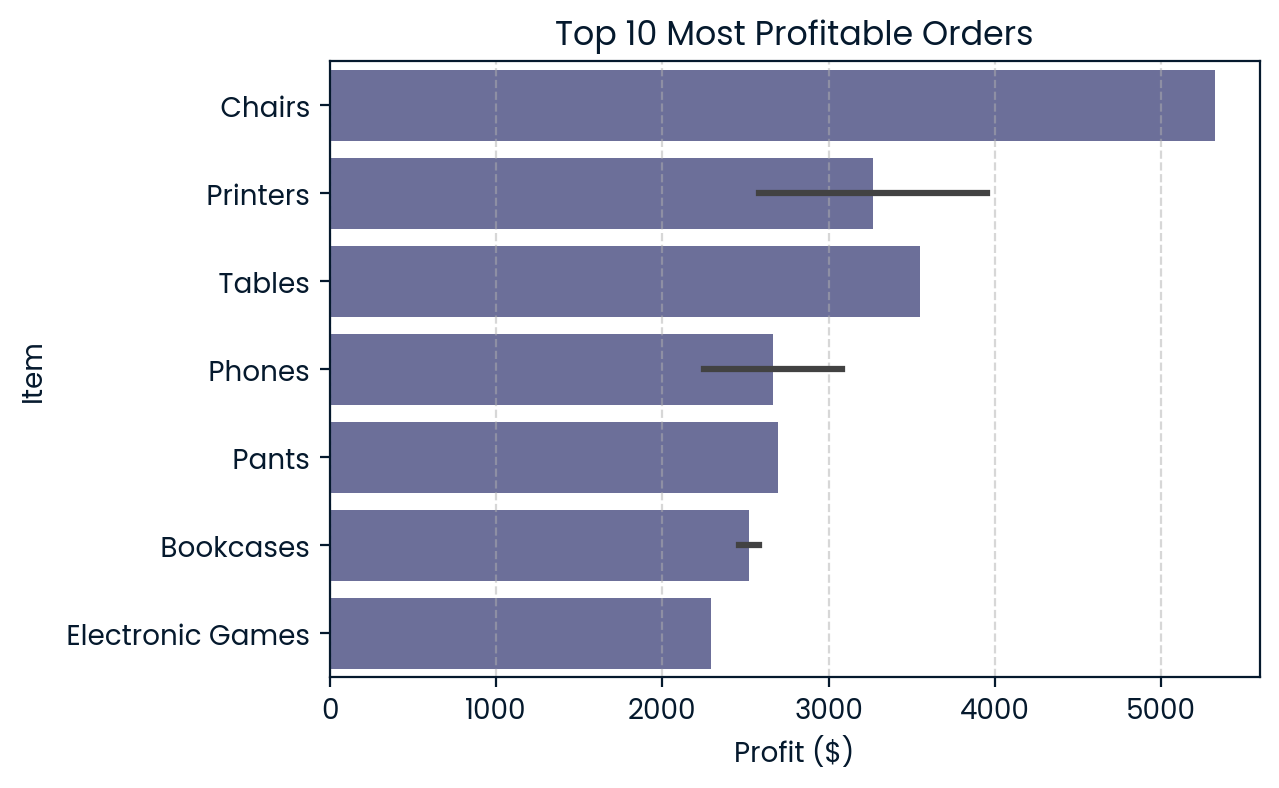

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x='Profit', y='Item', data=top10_orders)
plt.title("Top 10 Most Profitable Orders")
plt.xlabel("Profit ($)")
plt.ylabel('Item')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### Total Profit by Item in Each Category

In [230]:
item_profit = final_df.groupby(['Category', 'Item'])['Profit'].sum().reset_index()

# Get top item per category
top_item_per_cat = item_profit.loc[item_profit.groupby('Category')['Profit'].idxmax()]
display(top_item_per_cat)

,Category,Item,Profit
0,Clothing,Dress,42933
11,Electronics,Printers,45955
12,Furniture,Bookcases,43716


##### Visualization

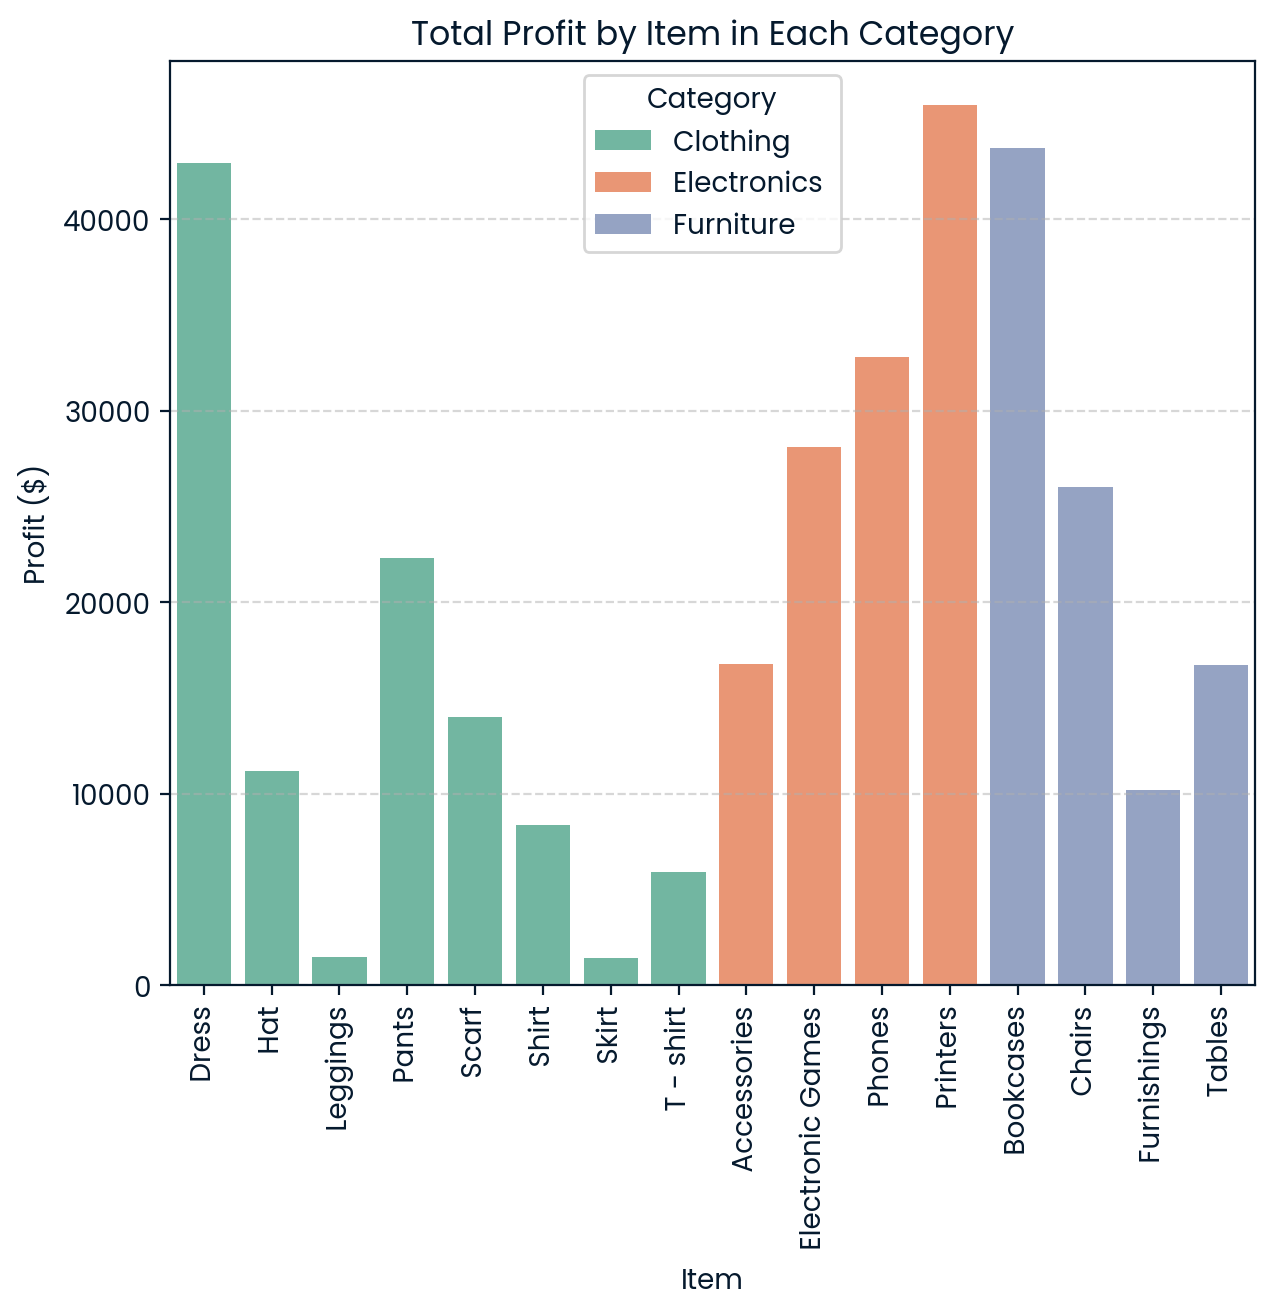

In [231]:
plt.figure(figsize=(7,6))
sns.barplot(x='Item', y='Profit', hue='Category', data=item_profit, palette='Set2')
plt.title("Total Profit by Item in Each Category")
plt.xticks(rotation=90)
plt.ylabel("Profit ($)")
plt.xlabel("Item")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Most Profitable Day of the Week

In [232]:
# Extract Day of Week from Order Date
final_df['Day of Week'] = final_df['Order Date'].dt.day_name()

# Move the column to beside Order Date column
move_column4 = 'Day of Week'
col=final_df.pop(move_column4)
final_df.insert(2, move_column4, col)

final_df.head()

,Order ID,Order Date,Day of Week,CustomerName,State,Region,Sale Price,Cost per Item,Profit,Category,Item,COD,Credit Card,Debit Card,EFT,Margin %
0,B-25935,2023-01-04,Wednesday,Lambert,Arizona,West,150,39,111,Clothing,Hat,0,3,0,0,74.00
1,B-25935,2023-01-04,Wednesday,Lambert,Arizona,West,162,47,115,Furniture,Chairs,0,0,0,3,70.99
2,B-25935,2023-01-04,Wednesday,Lambert,Arizona,West,1657,299,1358,Furniture,Chairs,4,0,0,0,81.96
3,B-25653,2023-05-08,Monday,Morris,Arizona,West,115,90,25,Electronics,Accessories,0,1,0,0,21.74
4,B-25653,2023-05-08,Monday,Morris,Arizona,West,1279,239,1040,Electronics,Printers,0,0,0,8,81.31


In [233]:
#Analysis
day_profit = final_df.groupby('Day of Week')['Profit'].sum().sort_values(ascending=False)
display(day_profit)


Day of Week
Saturday     57016
Friday       51343
Wednesday    50341
Monday       49337
Thursday     42207
Sunday       41393
Tuesday      36434
Name: Profit, dtype: int64

##### Visualization

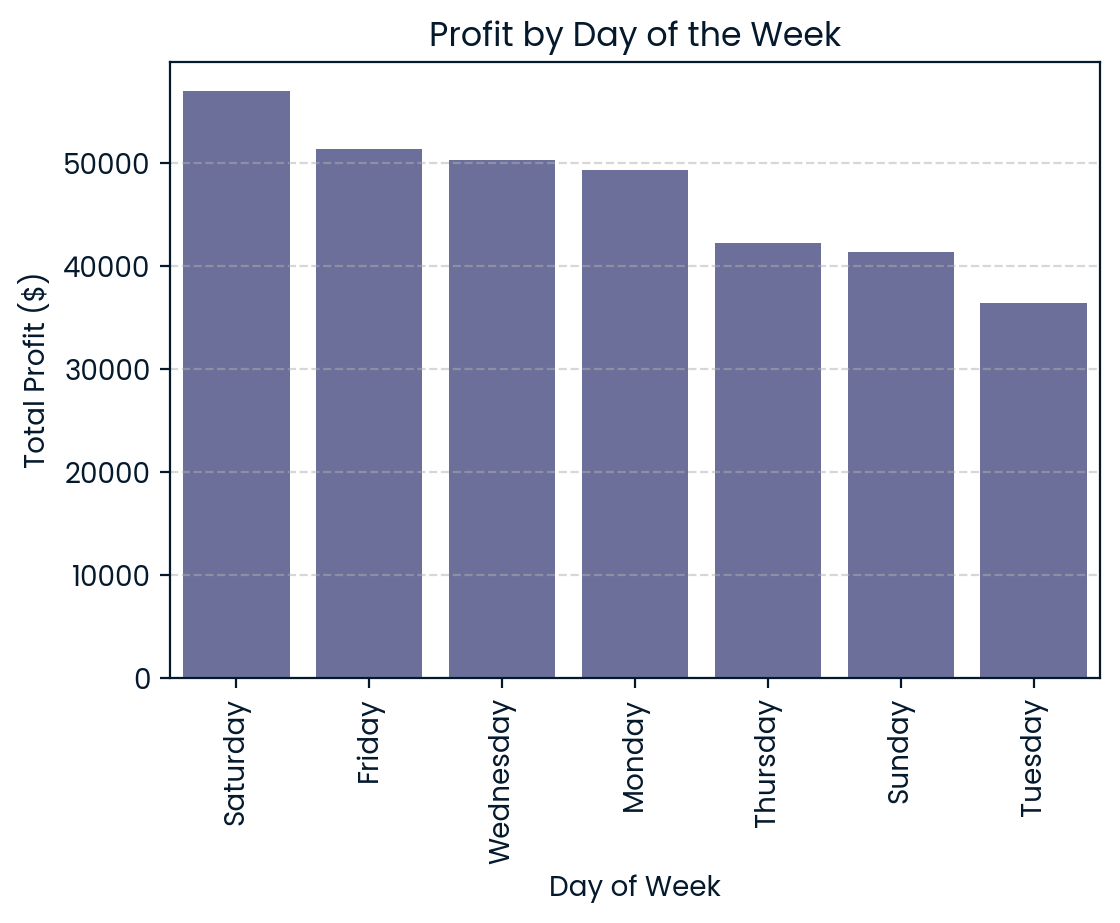

In [234]:
plt.figure(figsize=(6,4))
sns.barplot(x=day_profit.index, y=day_profit.values)
plt.title("Profit by Day of the Week")
plt.ylabel("Total Profit ($)")
plt.xlabel("Day of Week")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Total Sales per Month and Total Profit per Month

In [235]:
# Extract month names
final_df['Month'] = final_df['Order Date'].dt.month_name()

# Create a categorical month column to preserve order
import calendar
final_df['Month'] = pd.Categorical(
    final_df['Month'],
    categories=list(calendar.month_name)[1:],  # ['January', 'February', ..., 'December']
    ordered=True
)

#Total Sales per Month
# Group the month by sale price for plotting a chart
monthly_sales = final_df.groupby('Month')['Sale Price'].sum().reindex(list(calendar.month_name)[1:])
print(monthly_sales)

Month
January      61632
February     38962
March        60694
April        34330
May          29093
June         23658
July         12966
August       31492
September    27283
October      31613
November     48469
December     37579
Name: Sale Price, dtype: int64


In [236]:
# Calculate Monthly Profit
final_df.groupby('Month')['Profit']

monthly_profit = final_df.groupby('Month')['Profit'].sum()
print(monthly_profit)

Month
January      48035
February     29751
March        46671
April        26075
May          19705
June         16746
July          8418
August       23145
September    20302
October      24813
November     37821
December     26589
Name: Profit, dtype: int64


##### Visualization

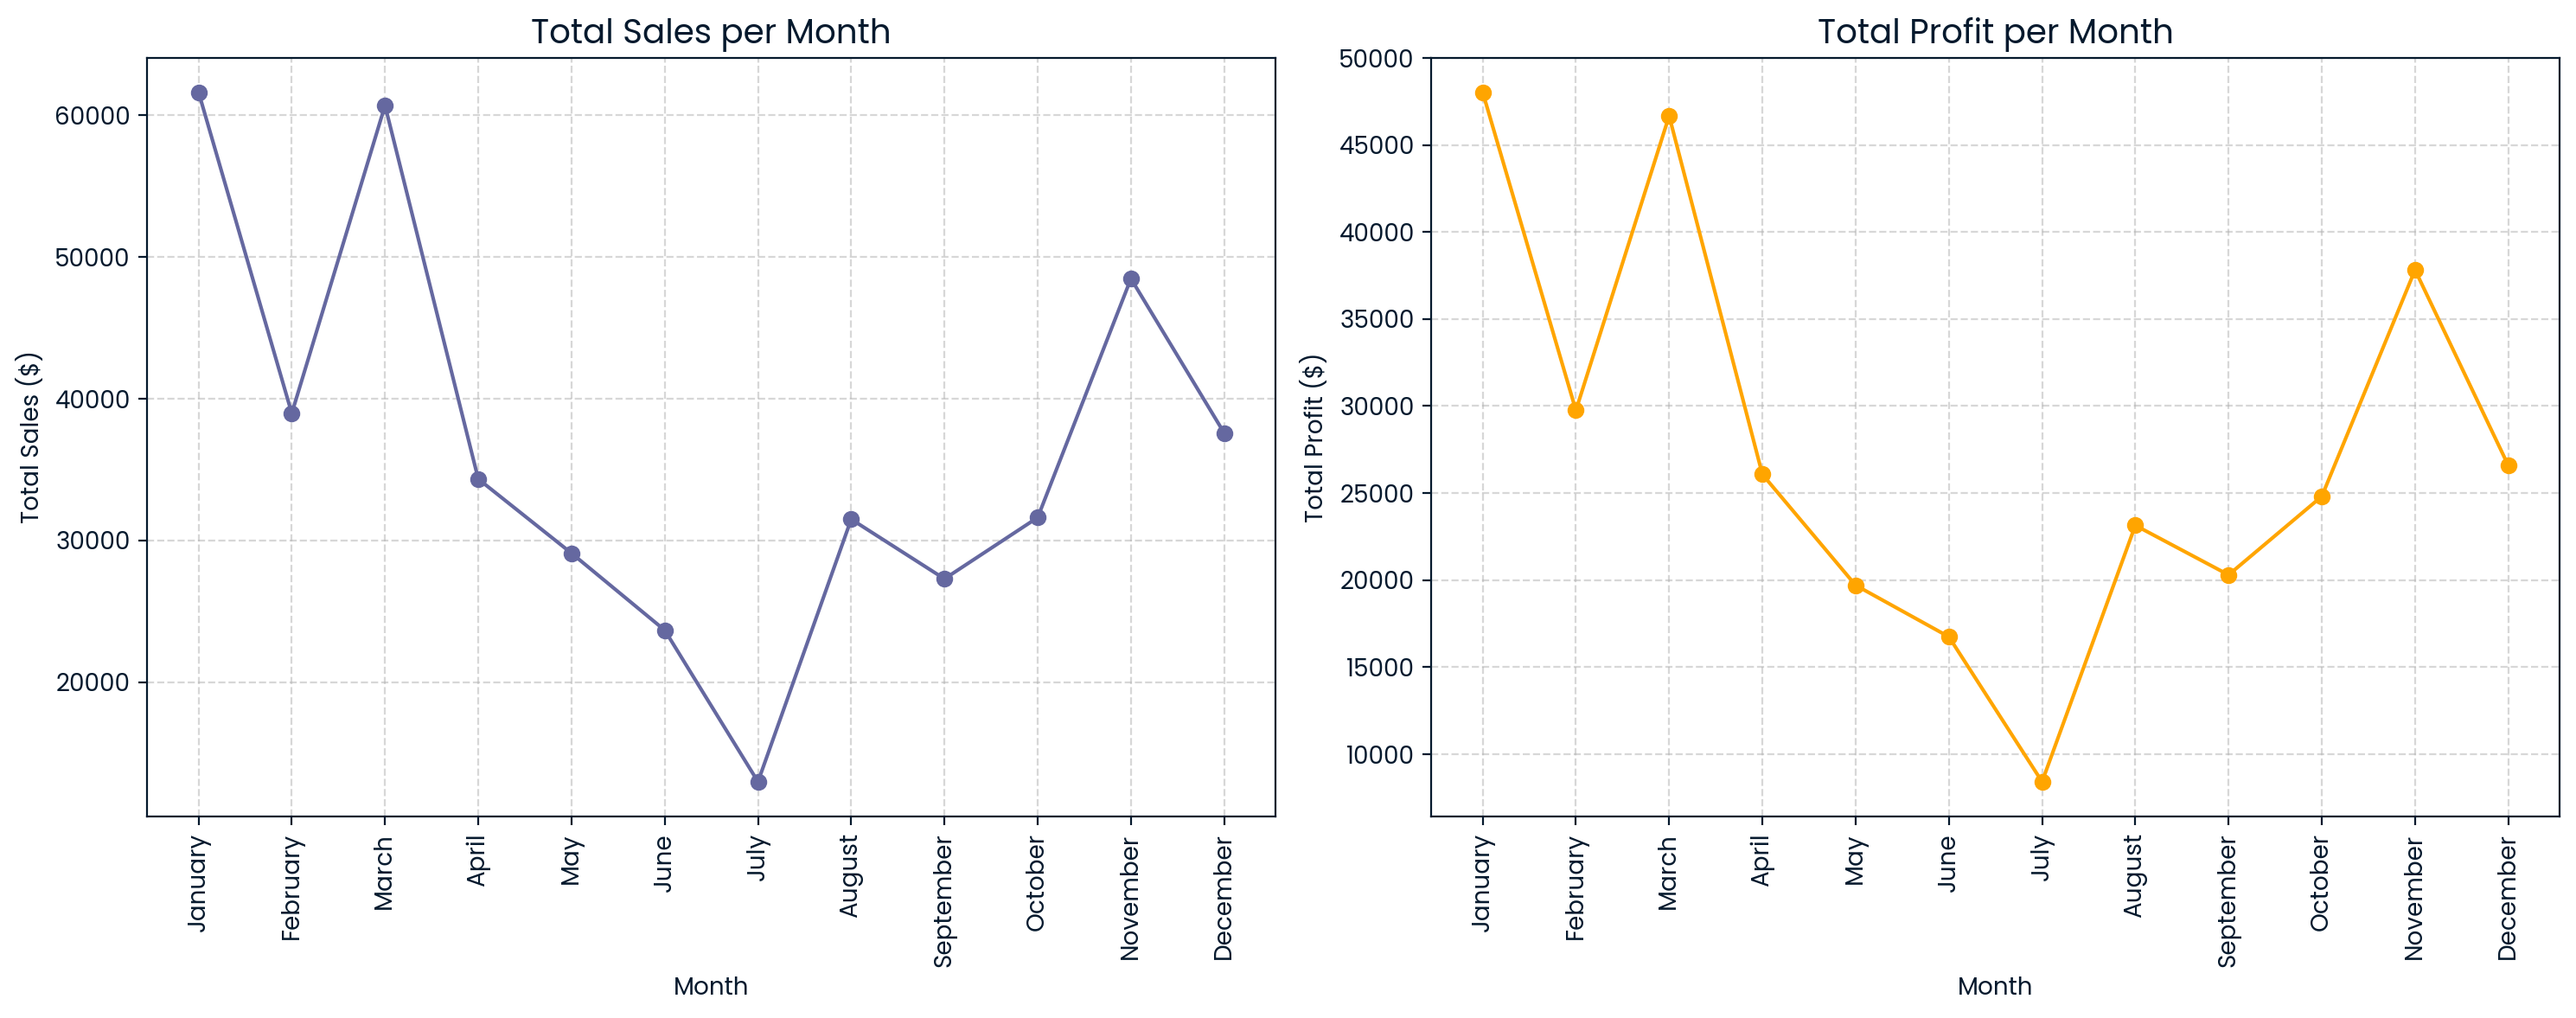

In [237]:
#Create subplots
plt.figure(figsize=(15, 6))

# Subplot 1: Total Sales per Month
plt.subplot(1, 2, 1)
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Total Sales per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 2: Total Profit per Month
plt.subplot(1, 2, 2)
plt.plot(monthly_profit.index, monthly_profit.values, color='orange', marker='o')
plt.title("Total Profit per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

### Profit by Region

In [238]:
final_df.groupby('Region')['Profit'].sum()

Region
Midwest       72368
Northeast     60340
Southeast    100029
West          95334
Name: Profit, dtype: int64

##### Visualization

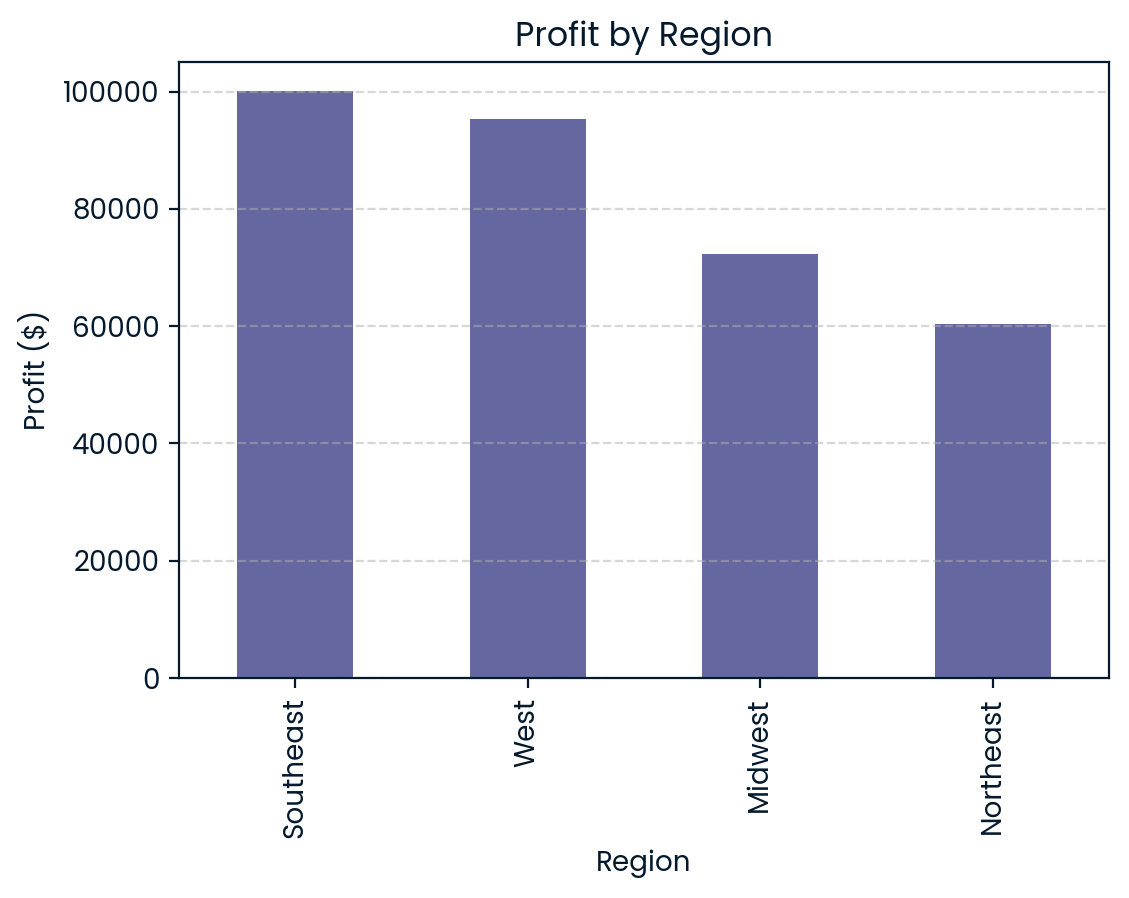

In [239]:
region_profit = final_df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit.plot(kind='bar', figsize=(6,4))
plt.title("Profit by Region")
plt.ylabel("Profit ($)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Profit by Category and Region

In [240]:
category_region = final_df.groupby(['Category', 'Region'])['Profit'].sum().unstack()
display(category_region)

Region,Midwest,Northeast,Southeast,West
Category,,,,
Clothing,22452,23509,35080,26651
Electronics,27332,20428,35394,40491
Furniture,22584,16403,29555,28192


##### Visualization

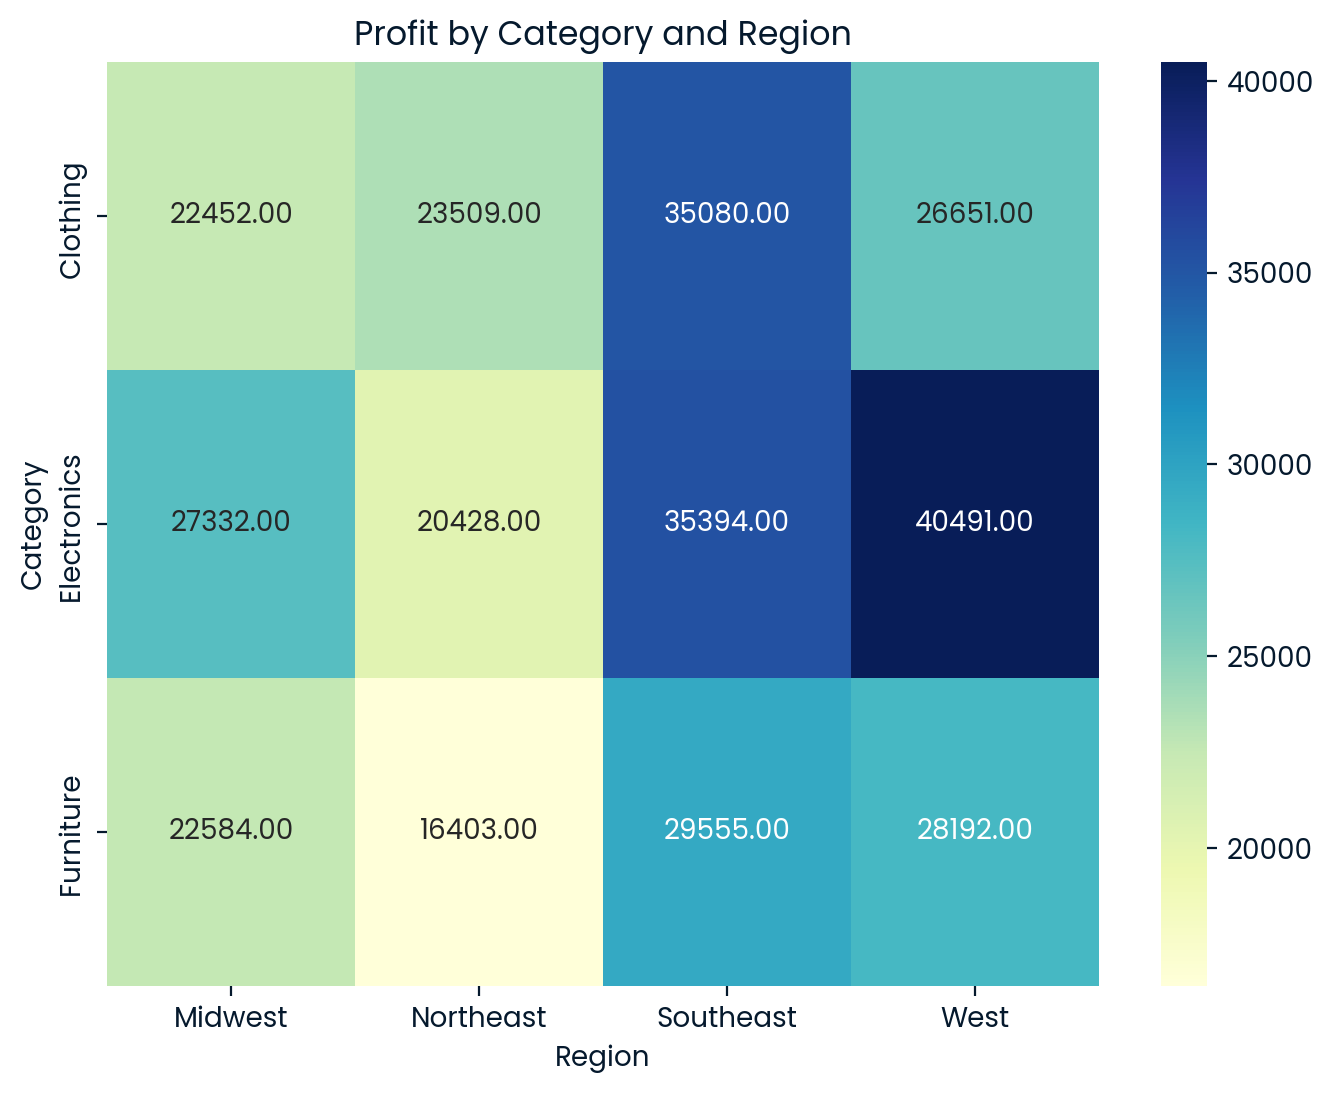

In [241]:
# Visualization (heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(category_region, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Profit by Category and Region")
plt.show()


### Average Order Value (AOV) by Region

In [242]:
final_df.groupby('Region')['Sale Price'].mean()

Region
Midwest      311.463333
Northeast    247.683582
Southeast    278.937370
West         330.950777
Name: Sale Price, dtype: float64

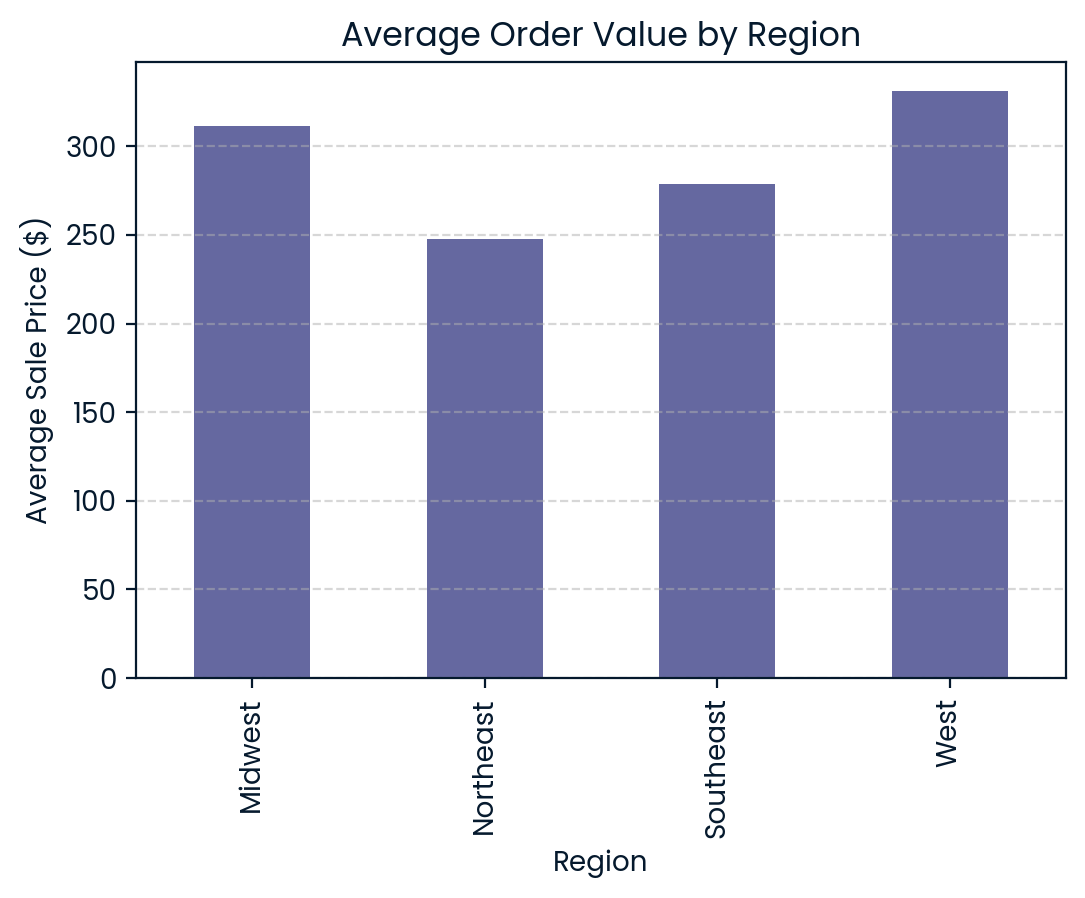

In [243]:
aov_region = final_df.groupby('Region')['Sale Price'].mean()
aov_region.plot(kind='bar', figsize=(6,4))
plt.title("Average Order Value by Region")
plt.ylabel("Average Sale Price ($)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Profit by State

In [244]:
profit_state = final_df.groupby('State')['Profit'].sum().sort_values(ascending=True)
display(profit_state)

State
Maryland           3695
Massachusetts      4503
Wisconsin          5184
Indiana            6788
Tennessee          7148
Missouri           7942
Arizona            8877
Michigan           9092
Washington         9773
New Jersey         9862
Virginia           9960
Georgia           10472
Illinois          12432
New York          15933
Pennsylvania      16387
North Carolina    17150
Ohio              30930
Florida           65259
California        76684
Name: Profit, dtype: int64

##### Visualization

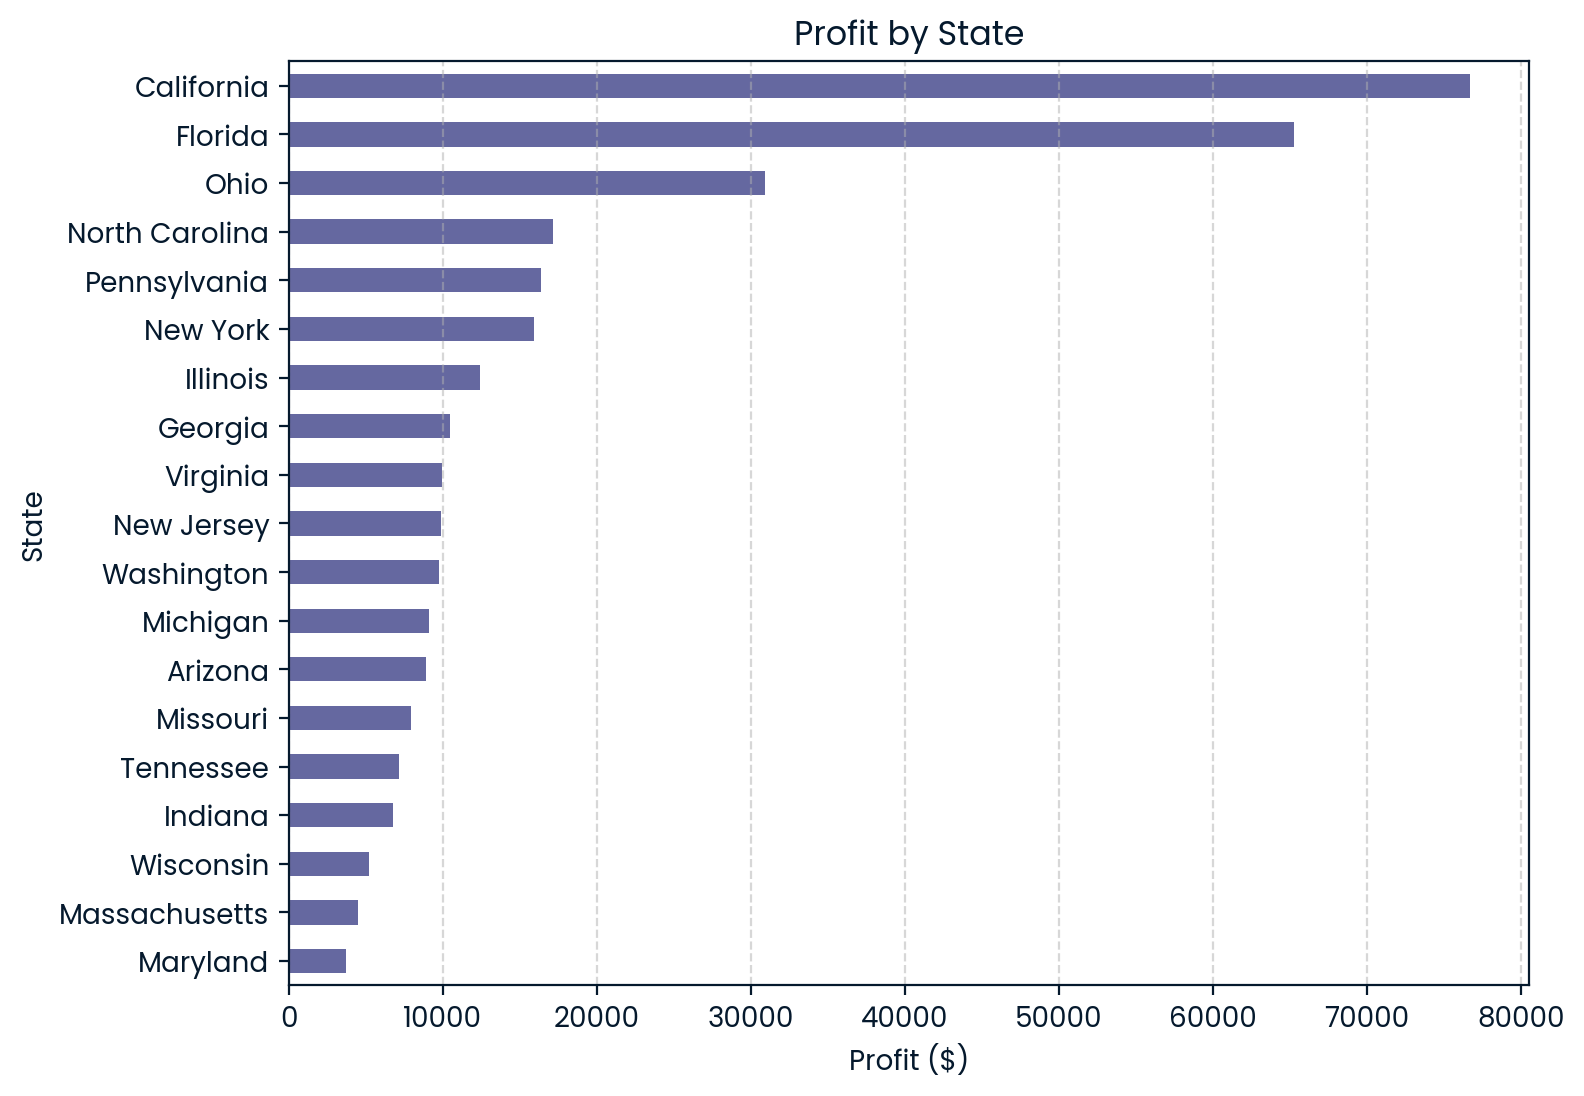

In [245]:
profit_state.plot(kind='barh', figsize=(8,6))
plt.title("Profit by State")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlabel("Profit ($)")
plt.show()

### Top 10 Customers by Total Profit

In [246]:
# Step 1: Get top 10 customers by profit
top_customers = final_df.groupby(['CustomerName', 'Region'])['Profit'].sum().nlargest(10).reset_index()
display(top_customers)

,CustomerName,Region,Profit
0,Gardner,Midwest,8063
1,Reed,Midwest,6891
2,Pena,West,5385
3,Bailey,Southeast,4836
4,Andrews,Midwest,4658
5,Adams,West,4427
6,Bennett,West,4079
7,Wilson,Midwest,4047
8,Lee,West,4007
9,Williams,Northeast,3843


##### Visualization

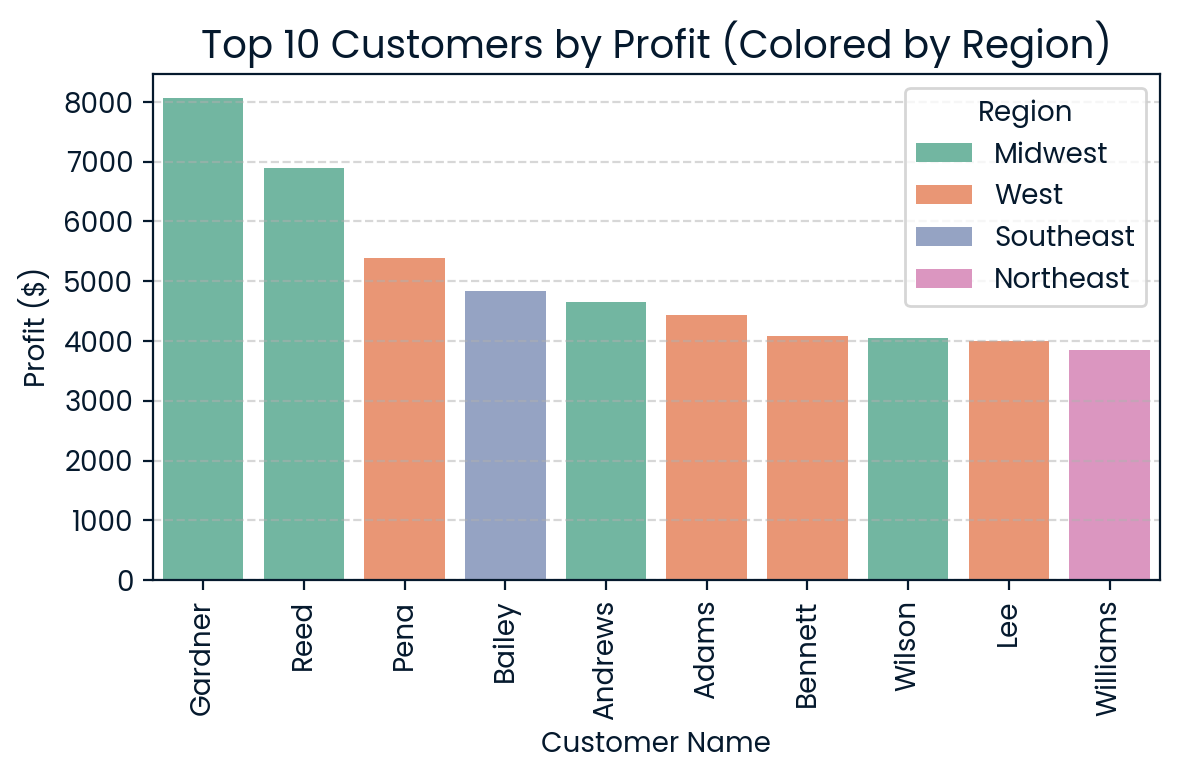

In [247]:
# Step 2: Plot using seaborn
plt.figure(figsize=(6,4))
sns.barplot(data=top_customers, x='CustomerName', y='Profit', hue='Region', palette='Set2')

# Step 3: Styling
plt.title("Top 10 Customers by Profit (Colored by Region)", fontsize=14)
plt.xlabel("Customer Name")
plt.ylabel("Profit ($)")
plt.xticks(rotation=90)
plt.legend(title="Region")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Payment Method Distribution

In [248]:
# Sum up all payment values to compare totals
payment_summary = final_df[['COD', 'EFT', 'Debit Card', 'Credit Card']].sum().sort_values(ascending=False)

print(payment_summary)

Credit Card    2456
EFT            1746
Debit Card      741
COD             672
dtype: int64


##### Visualization

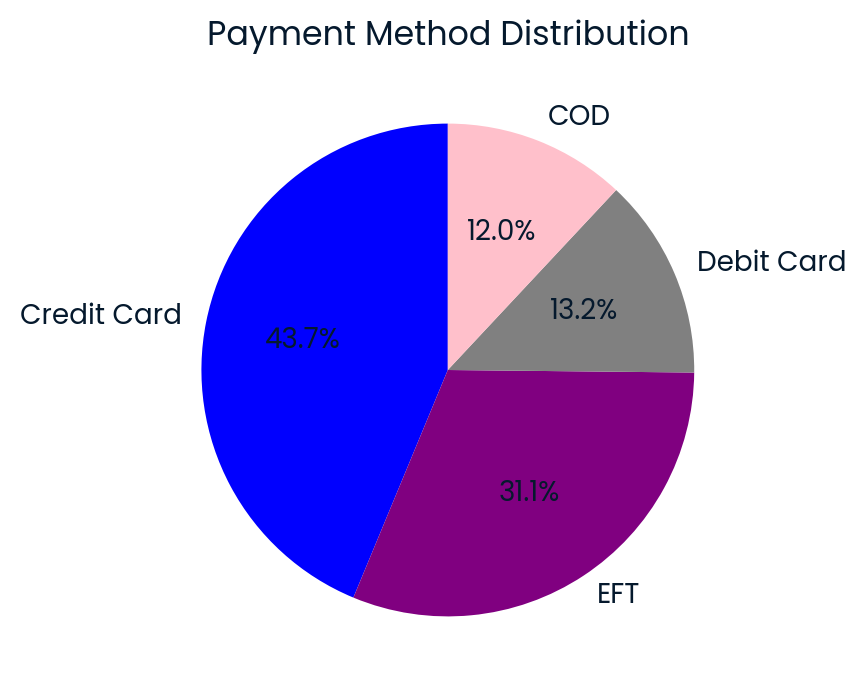

In [249]:
# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(payment_summary, 
        labels=payment_summary.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['Blue', 'Purple', 'Gray', 'Pink'])
plt.title('Payment Method Distribution')
plt.show()

### Total Profit by Payment Method

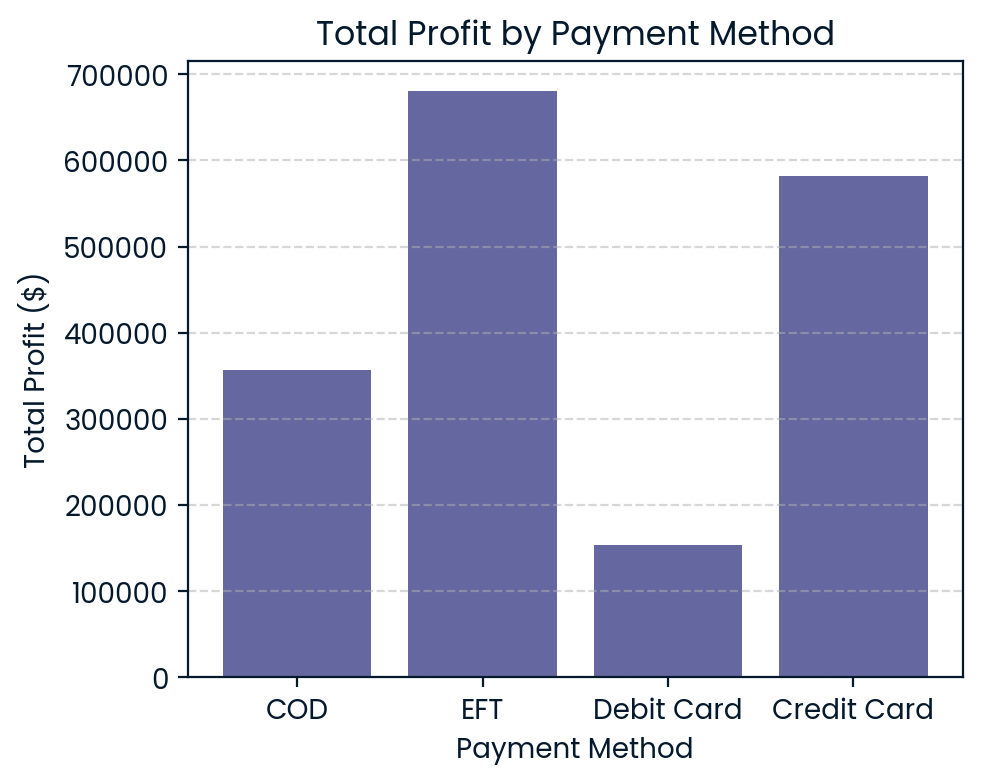

In [250]:
# Create a dictionary that maps each payment method to total profit generated
payment_profit = {
    'COD': (final_df['COD'] *  final_df['Profit']).sum(),
    'EFT': ( final_df['EFT'] * final_df['Profit']).sum(),
    'Debit Card': (final_df['Debit Card'] * final_df['Profit']).sum(),
    'Credit Card': (final_df['Credit Card'] * final_df['Profit']).sum()
}

# Convert to a DataFrame for easier plotting
payment_profit_df = pd.DataFrame(list(payment_profit.items()), columns=['Payment Method', 'Total Profit'])

# Plot the bar chart
plt.figure(figsize=(5,4))
plt.bar(payment_profit_df['Payment Method'], payment_profit_df['Total Profit']) #color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])
plt.title('Total Profit by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Profit ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [251]:
# 🧾 EXECUTIVE SUMMARY

# 1: Total profit, sales and average margin
total_profit = final_df['Profit'].sum()
total_sales = final_df['Sale Price'].sum()
avg_margin = final_df['Margin %'].mean()

# 2️: Most profitable order
top_order = final_df.loc[final_df['Profit'].idxmax()]
top_order_id = top_order['Order ID']
top_order_profit = top_order['Profit']
top_order_customer = top_order['CustomerName']

# 3️: Most profitable region
region_profit = final_df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
most_profitable_region = region_profit.idxmax()
most_profitable_region_value = region_profit.max()

# 4️: Most profitable category
category_profit = final_df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
most_profitable_category = category_profit.idxmax()
most_profitable_category_value = category_profit.max()

# 5️: Most profitable sub-category
item_profit = final_df.groupby('Item')['Profit'].sum().sort_values(ascending=False)
most_profitable_item = item_profit.idxmax()
most_profitable_item_value = item_profit.max()

# 6️: Most profitable day of the week
final_df['Day'] = final_df['Order Date'].dt.day_name()
day_profit = final_df.groupby('Day')['Profit'].sum().sort_values(ascending=False)
most_profitable_day = day_profit.idxmax()
most_profitable_day_value = day_profit.max()

# 7️: Top 10 orders
top_orders = final_df.nlargest(10, 'Profit')[['Order ID', 'CustomerName', 'Profit', 'Region']]

# 8: Most profitable payment method
most_profitable_method = payment_profit_df.loc[payment_profit_df['Total Profit'].idxmax(), 'Payment Method']
most_profitable_value = payment_profit_df['Total Profit'].max()

# 9: Least profitable method
least_profitable_method = payment_profit_df.loc[payment_profit_df['Total Profit'].idxmin(), 'Payment Method']
least_profitable_value = payment_profit_df['Total Profit'].min()





In [252]:
print("📊 EXECUTIVE SUMMARY 📊")
print("="*50)
print(f" Total Sales: ${total_sales:,.2f}")
print(f" Total Profit: ${total_profit:,.2f}")
print(f" Average Profit Margin: {avg_margin:.2f}%\n")


print(f" Most Profitable Region: {most_profitable_region} (${most_profitable_region_value:,.2f})")
print(f" Most Profitable Category: {most_profitable_category} (${most_profitable_category_value:,.2f})")
print(f" Top Item (Sub-category): {most_profitable_item} (${most_profitable_item_value:,.2f})\n")

print(f" Most Profitable Day: {most_profitable_day} (${most_profitable_day_value:,.2f})")
print(f" Highest Profit Order: {top_order_id} (Customer: {top_order_customer}) — Profit: ${top_order_profit:,.2f}\n")

print(f" Most profitable payment method: {most_profitable_method} (${most_profitable_value:,.2f})")
print(f" Least profitable payment method: {least_profitable_method} (${least_profitable_value:,.2f})\n")

print(" Top 10 Most Profitable Orders:")
print(top_orders.to_string(index=False))


print("="*50)
print(" Summary:")

print(f"The business performs best in the {most_profitable_region} region, "
      f"driven mainly by strong sales in the {most_profitable_category} category. "
      f"Across categories, items (sub-categories) like Dress,  Printers,  Bookcases "
      f"contributed significantly to overall profit.  The top sales are observed on", most_profitable_day,
      f"and high-value customers like", top_order_customer,
      f"significantly drive profits.The insights suggest focusing "
      f"on expanding successful product lines and replicating high-margin strategies "
      f"from the {most_profitable_region} region across others.")

📊 EXECUTIVE SUMMARY 📊
 Total Sales: $437,771.00
 Total Profit: $328,071.00
 Average Profit Margin: 64.04%

 Most Profitable Region: Southeast ($100,029.00)
 Most Profitable Category: Electronics  ($123,645.00)
 Top Item (Sub-category):  Printers ($45,955.00)

 Most Profitable Day: Saturday ($57,016.00)
 Highest Profit Order: B-26055 (Customer: Gardner) — Profit: $5,325.00

 Most profitable payment method: EFT ($680,877.00)
 Least profitable payment method: Debit Card ($153,670.00)

 Top 10 Most Profitable Orders:
Order ID CustomerName  Profit    Region
 B-26055      Gardner    5325   Midwest
 B-25973         Reed    3954   Midwest
 B-25993       Bailey    3552 Southeast
 B-25923       Weaver    3079      West
 B-25757     Reynolds    2696 Southeast
 B-26093        Adams    2581      West
 B-25955         Pena    2580      West
 B-25798       Valdez    2460      West
 B-25858       Barker    2295      West
 B-25602     Hamilton    2251      West
 Summary:
The business performs best in t